In [1]:
from bs4 import BeautifulSoup as Soup
import numpy as np
from scipy.ndimage import affine_transform
from PIL import Image
import os

import sys
sys.path.append("/home/tintin/rongheng/cv/")

from lib.image_lib import load_img, show_img, save_img
import registration as reg

xml_filename = "jkfaces.xml"

In [2]:
faces = reg.read_points_xml(xml_filename)
reg.rigid_alignment(faces, 'jkfaces2008_small/')

In [3]:
path = os.path.join(os.getcwd() + "/jkfaces2008_small/registerd/")
files = os.listdir(path)
# Assuming all images are the same size, get dimensions of first image
w,h = Image.open(path+files[0]).size
N = len(files)

# Create a numpy array of floats to store the average (assume RGB) images
average = np.zeros((h,w,3), np.float)

In [4]:
# Build up average pixel intensities, casting each image as an array of floats.
for file in files:
    image = np.array(Image.open(path+file), dtype=np.float)
    average += image/N

# Round values in array and cast as 8-bit integer
average = np.array(np.round(average), dtype=np.uint8)

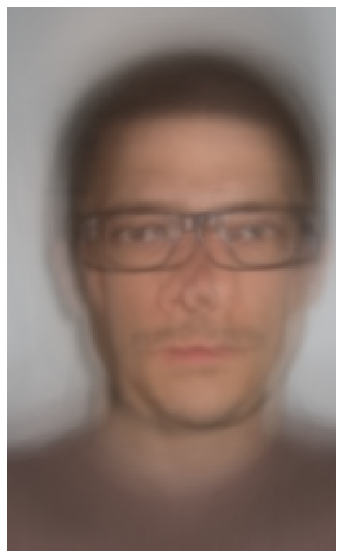

In [5]:
# Generate, save and preview final image
show_img(average)
save_img(average, 'average.jpg')

In [6]:
#mask = np.zeros(img.shape())
#immatrix = np.array([mask* np.array(Image.open(imlist[i]).convert('L')).flatten() for i in range(150)], 'f')